In [1]:
%matplotlib inline
import geopandas as gpd

In [2]:
setor = gpd.read_file('./data/Mapas/RJ-SETOR/RJ-SETOR.shp')

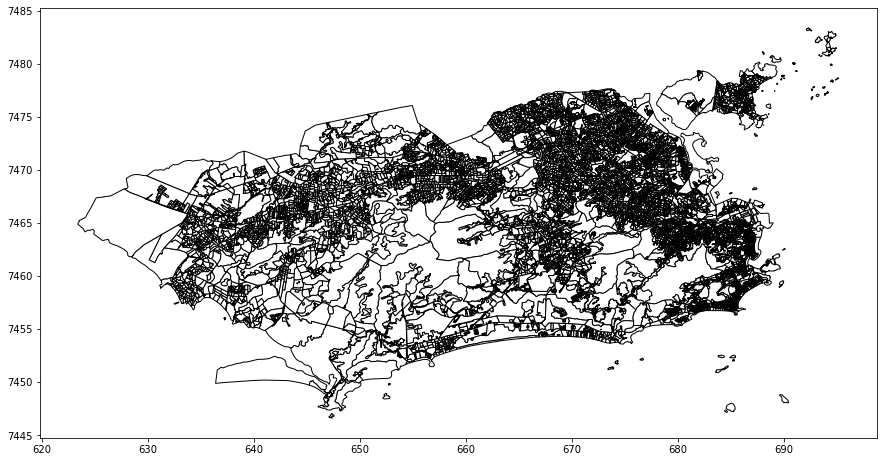

In [3]:
setor.plot(color='white', edgecolor='black', figsize=(15, 8))

In [4]:
setor.head()

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,408203,330455705300140,URBANO,330455705140,Costa Barros,330455705,RIO DE JANEIRO,330455705,PAVUNA,3304557,...,2.44,865.00,853496.00,1000.39,851626.14,539.62,577184.79,879.99,642059.29,"POLYGON ((667.016 7474.986, 667.043 7475.005, ..."
1,408204,330455705300141,URBANO,330455705140,Costa Barros,330455705,RIO DE JANEIRO,330455705,PAVUNA,3304557,...,2.25,746.23,400714.52,856.36,365433.86,489.76,319508.08,776.84,283719.10,"POLYGON ((667.363 7475.226, 667.340 7475.194, ..."
2,408205,330455705300142,URBANO,330455705140,Costa Barros,330455705,RIO DE JANEIRO,330455705,PAVUNA,3304557,...,2.38,873.25,599998.55,987.60,565496.46,574.79,577333.14,883.40,614759.44,"POLYGON ((667.305 7475.856, 667.299 7475.873, ..."
3,408198,330455705300135,URBANO,330455705140,Costa Barros,330455705,RIO DE JANEIRO,330455705,PAVUNA,3304557,...,2.43,546.45,268682.25,701.42,235688.46,382.13,205907.30,642.09,178882.45,"MULTIPOLYGON (((666.791 7475.488, 666.791 7475..."
4,408199,330455705300136,URBANO,330455705140,Costa Barros,330455705,RIO DE JANEIRO,330455705,PAVUNA,3304557,...,2.37,530.38,173914.73,692.98,114118.18,345.61,155947.84,657.36,91425.38,"POLYGON ((666.751 7475.226, 666.793 7475.255, ..."


In [5]:
setor_m = setor[['NM_BAIRRO', 'geometry']]

Ao tentar realizar o dissolve é apresentado um erro devido ao crs

In [6]:
bairro = setor_m.dissolve(by='NM_BAIRRO')

TopologyException: side location conflict at 633.64508273371177 7465.1179046438592. This can occur if the input geometry is invalid.


ValueError: No Shapely geometry can be created from null value

Para controlar o problema do crs:

In [7]:
setor = setor.to_crs({'init' : 'epsg:4326'})
setor_m = setor[['NM_BAIRRO', 'geometry']]

/home/yorinori/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [8]:
bairro = setor_m.dissolve(by='NM_BAIRRO')

In [9]:
bairro

,geometry
NM_BAIRRO,
Abolição,"POLYGON ((-43.30071 -22.89112, -43.30094 -22.8..."
Acari,"POLYGON ((-43.34222 -22.82782, -43.34253 -22.8..."
Alto da Boa Vista,"POLYGON ((-43.29408 -22.97996, -43.29412 -22.9..."
Anchieta,"POLYGON ((-43.41149 -22.83311, -43.41164 -22.8..."
Andaraí,"POLYGON ((-43.25443 -22.93426, -43.25443 -22.9..."
...,...
Vila Valqueire,"POLYGON ((-43.36708 -22.89711, -43.36718 -22.8..."
Vila da Penha,"POLYGON ((-43.31466 -22.84846, -43.31551 -22.8..."
Vista Alegre,"POLYGON ((-43.31923 -22.83183, -43.31931 -22.8..."


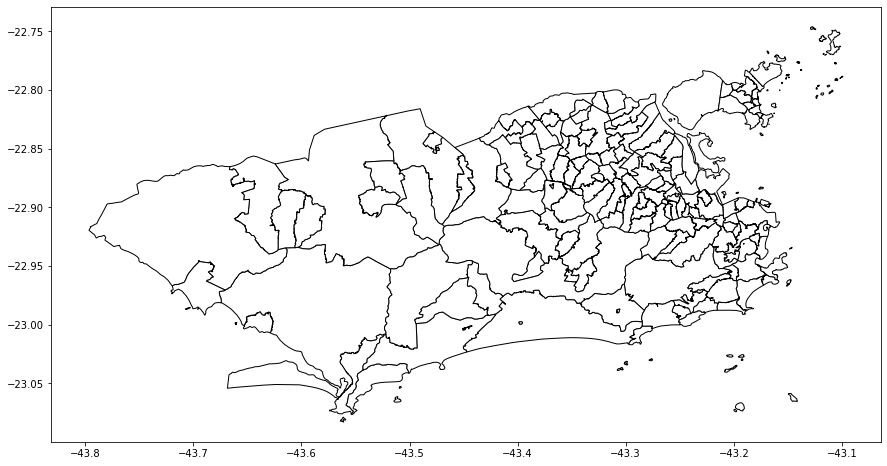

In [10]:
bairro.plot(color='white', edgecolor='black', figsize=(15, 8))

In [11]:
setor_m = setor[['NM_BAIRRO', 'geometry', 'V002']]

In [12]:
bairro = setor_m.dissolve(by='NM_BAIRRO', aggfunc='sum')

In [13]:
bairro

,geometry,V002
NM_BAIRRO,,
Abolição,"POLYGON ((-43.30071 -22.89112, -43.30094 -22.8...",11356.0
Acari,"POLYGON ((-43.34222 -22.82782, -43.34253 -22.8...",26967.0
Alto da Boa Vista,"POLYGON ((-43.29408 -22.97996, -43.29412 -22.9...",9189.0
Anchieta,"POLYGON ((-43.41149 -22.83311, -43.41164 -22.8...",55634.0
Andaraí,"POLYGON ((-43.25443 -22.93426, -43.25443 -22.9...",39325.0
...,...,...
Vila Valqueire,"POLYGON ((-43.36708 -22.89711, -43.36718 -22.8...",32232.0
Vila da Penha,"POLYGON ((-43.31466 -22.84846, -43.31551 -22.8...",25462.0
Vista Alegre,"POLYGON ((-43.31923 -22.83183, -43.31931 -22.8...",8622.0


In [14]:
setor_m['V002'].sum()

6283486.0

In [15]:
bairro['V002'].sum()

6283486.0

In [16]:
bairro = bairro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [17]:
bairro.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [18]:
bairro.reset_index(inplace=True)

In [19]:
bairro

,NM_BAIRRO,geometry,V002
0,Abolição,"POLYGON ((674.303 7467.528, 674.279 7467.516, ...",11356.0
1,Acari,"POLYGON ((670.123 7474.585, 670.092 7474.573, ...",26967.0
2,Alto da Boa Vista,"POLYGON ((674.869 7457.682, 674.865 7457.684, ...",9189.0
3,Anchieta,"POLYGON ((663.007 7474.077, 662.992 7474.088, ...",55634.0
4,Andaraí,"POLYGON ((678.995 7462.695, 678.995 7462.695, ...",39325.0
...,...,...,...
155,Vila Valqueire,"POLYGON ((667.487 7466.942, 667.476 7466.937, ...",32232.0
156,Vila da Penha,"POLYGON ((672.926 7472.267, 672.838 7472.218, ...",25462.0
157,Vista Alegre,"POLYGON ((672.478 7474.114, 672.471 7474.196, ...",8622.0
158,Zumbi,"POLYGON ((687.236 7474.843, 687.232 7474.848, ...",2016.0


In [20]:
import os

dir = './data/Mapas/RJ-BAIRRO'
if not os.path.exists(dir):
    os.makedirs(dir)

bairro.to_file(dir + '/RJ-BAIRRO.shp')

/home/yorinori/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
